In [198]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

***Start of class 2025.01.13***

# 1. Fundamentals

## Statistical Inference (GHV Chapter 4)

### Sampling distributions (GHV &sect; 4.1)

**Example:** Sampling distributions of $\bar{x}$ and $s^2$.

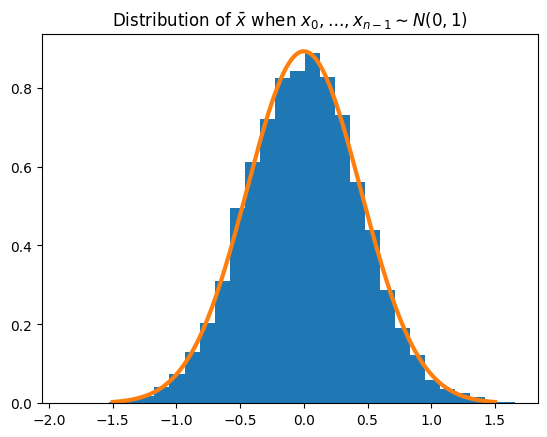

In [199]:
d = stats.norm()  # N(0, 1)
m = 10_000
n = 5
x = d.rvs(size=(m, n))
xbar = x.mean(axis=1)
plt.hist(xbar, bins=30, density=True)
plt.title("Distribution of $\\bar{x}$ when $x_0,\\ldots,x_{n-1}\\sim N(0, 1)$")
u = np.linspace(-1.5, 1.5, 1000)
plt.plot(u, stats.norm(0, 1 / np.sqrt(n)).pdf(u), lw=3)
plt.show()

***End of class 2025.01.13***

***Start of class 2025.01.15***

Text(0.5, 1.0, 'Distribution of $s^2$ when $x_0,\\ldots,x_{n-1}\\sim N(0, 1)$')

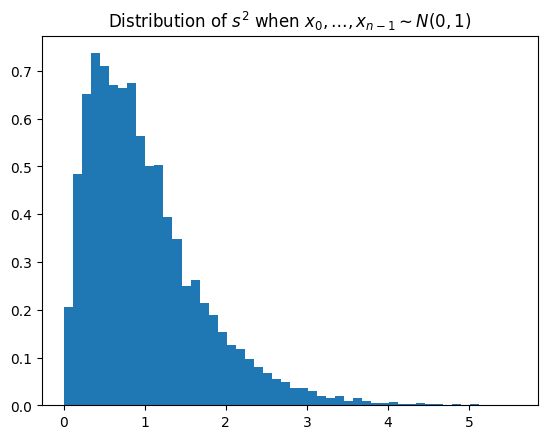

In [200]:
s2 = np.sum((x - x.mean(axis=1, keepdims=True)) ** 2, axis=1) / (n - 1)
assert np.allclose(s2, x.var(axis=1, ddof=1))
plt.hist(s2, bins=50, density=True)
plt.title("Distribution of $s^2$ when $x_0,\\ldots,x_{n-1}\\sim N(0, 1)$")

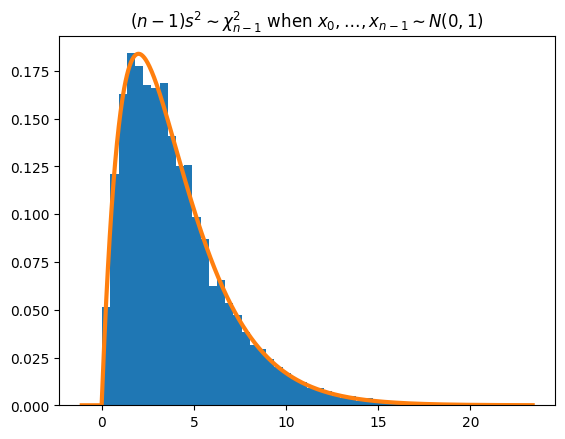

In [201]:
# Added after class

plt.hist((n - 1) * s2, bins=50, density=True)
u = np.linspace(*plt.xlim(), 1000)
plt.plot(u, stats.chi2(n - 1).pdf(u), lw=3)
plt.title("$(n - 1)s^2\\sim\\chi^2_{n - 1}$ when $x_0,\\ldots,x_{n - 1}\\sim N(0, 1)$")
plt.show()

### Standard error

- **standard error** means "standard deviation" or "estimate of standard deviation"

- $\displaystyle\operatorname{se}(\bar{x}) = \frac{\operatorname{se}(x)}{\sqrt{n}}$

### Bionomial proportion

- $y\sim \operatorname{Bin}(n, p)$

- $\displaystyle\hat{p}=\frac{y}{n}$

- $\displaystyle\operatorname{se}(\hat{p})=\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$

**Example:** In a survey of university students, 57 out of 146 of male respondents say they regularly tweeze their eyebrows.
Use a binomial model to estimate the proportion $p$ of male student eyebrow tweezers, and its standard error.

In [202]:
n = 146
y = 57
phat = y / n
sephat = np.sqrt(phat * (1 - phat) / n)
print(f"phat = {phat:.2f}\nsephat = {sephat:.2f}")

phat = 0.39
sephat = 0.04


### The Central Limit Theorem (CLT)

$$
\text{distribution of $\bar{x}$}\approx
N(\mu, \sigma^2/n)
$$

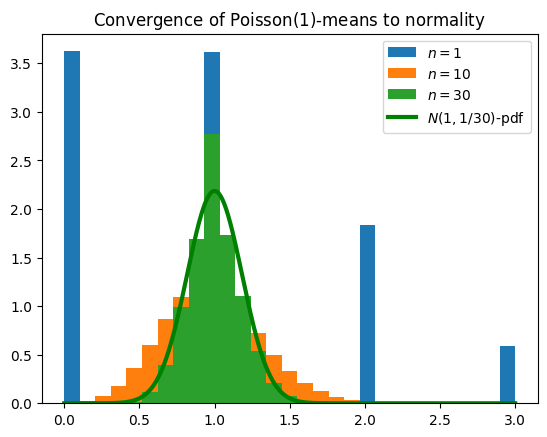

In [203]:
d = stats.poisson(1)
ns = [1, 10, 30]
m = 100_000
for n in ns:
    x = d.rvs(size=(m, n))
    xbar = x.mean(axis=1)
    bins = np.linspace(0, 3, 30)
    plt.hist(xbar, bins=bins, density=True, label=f"$n={n}$")

t = np.linspace(0, 3, 1000)
norm = stats.norm(1, 1 / np.sqrt(30))
plt.plot(t, norm.pdf(t), color="green", lw=3, label="$N(1, 1/30)$-pdf")
plt.legend()
plt.title("Convergence of $\\operatorname{Poisson}(1)$-means to normality")
plt.show()

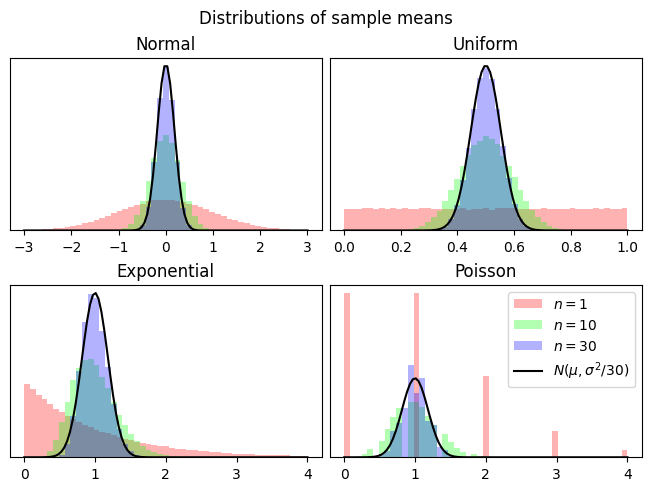

In [204]:
m = 100_000
fig, axes = plt.subplots(nrows=2, ncols=2, layout="constrained")
axes = axes.ravel()
plt.suptitle("Distributions of sample means")

ns = [1, 10, 30]
ds = [stats.norm(), stats.uniform(), stats.expon(), stats.poisson(1)]
cs = [(1, 0, 0, 0.3), (0, 1, 0, 0.3), (0, 0, 1, 0.3)]
lows = [-3, 0, 0, 0]
highs = [3, 1, 4, 4]
titles = ["Normal", "Uniform", "Exponential", "Poisson"]

for ax, d, low, high, title in zip(axes, ds, lows, highs, titles):
    bins = np.linspace(low, high, 50)
    for n, c in zip(ns, cs):
        x = d.rvs(size=(m, n))
        xbar = x.mean(axis=1)
        ax.hist(xbar, bins=bins, label=f"$n={n}$", color=c, density=True)
        ax.set_yticks([])
        ax.set_title(title)
    xbars = np.linspace(low, high, 100)
    norm = stats.norm(d.mean(), d.std() / np.sqrt(n))
    ax.plot(xbars, norm.pdf(xbars), "k", label="$N(\\mu, \\sigma^2/30)$")


axes[-1].legend()
plt.show()

### Confidence intervals for the mean

$$
\text{$100(1-\alpha)$\%-CI} =
        [\bar{x} \pm z_{\alpha/2}\operatorname{se}(\bar{x})]
$$

**Example:**
Continuing the previous example, give the $95$\%-CI for the proportion of male student eyebrow tweezers.

In [205]:
n = 146
y = 57
phat = y / n
sephat = np.sqrt(phat * (1 - phat) / n)
z95 = stats.norm().ppf(1 - 0.05 / 2)
print(f"95%-CI = [{phat:.2f} ± {z95*sephat:.2f}]")

95%-CI = [0.39 ± 0.08]


***End of class 2024.01.15***

***Start of class 2024.01.17 (recorded 2024.01.16)***

### Today

- Inference from multiple datasets/models (GHV Chapter 4)
  - Comparing estimates
  - Pooled estimates

- Hypothesis testing vignette (GHV Chapter 4)

- DIY models (GHV Chapter 5)

### Comparing means and proportions

$$
\operatorname{se}(x- y) = \sqrt{\operatorname{se}(x)^2 + \operatorname{se}(y)^2}\qquad (\text{$x$, $y$ indep.})
$$

**Example:**
In a survey of voting intentions, 57\% of 400 men 45\% of 600 women
say they plan to vote for the Republican candidate in an upcoming election. Estimate the **gender gap**,
its standard error, and its 99.9%-confidence interval.


In [206]:
m = 400
phat = 0.57
n = 600
qhat = 0.45
gap = phat - qhat
sephat = np.sqrt(phat * (1 - phat) / m)
seqhat = np.sqrt(qhat * (1 - qhat) / n)
segap = np.sqrt(sephat**2 + seqhat**2)
print(f"phat = {phat:.2f}, sephat = {sephat:.2f}")
print(f"qhat = {qhat:.2f}, seqhat = {seqhat:.2f}")
print(f"gap = {gap:.2f}, segap = {segap:.2f}")
z999 = stats.norm().ppf(1 - 0.001 / 2)
print(f"99.9%-CI = [{gap:.2f}, ± {z999*segap:.2f}]")

phat = 0.57, sephat = 0.02
qhat = 0.45, seqhat = 0.02
gap = 0.12, segap = 0.03
99.9%-CI = [0.12, ± 0.11]


### Pooling estimates

**Standard error of a weighted sum:**
$$
\operatorname{se}\left(\sum_i w_ix_i\right)
= \sqrt{w_i^2\sum_i\operatorname{se}(x_i)^2}
$$

**Example:** Estimate the proportion of Canadians that are happy are based on regional polls. *See Assignment 1.*

### A goodness of fit test (cf. GHV &sect;4.6)

**Example:** The 1000 votes in an election with two candidates, A and B, are tallied $10$ batches of $100$. The counters report the following batch tallies $y_i$ for candidate A:
$$
61,\, 64,\, 54,\, 61,\, 59,\, 58,\, 65,\, 62,\, 61,\, 59
$$
Candidate B protests, suggesting these results exhibit implausible uniformity.
Does he have a case?
Analyze using the **test statistic**
$$
T = \left(\frac1{\bar{y}} + \frac1{100 - \bar{y}}\right)\sum_{i<10} (y_i - \bar{y})^2.
$$

In [207]:
y = np.array([61, 64, 54, 61, 59, 58, 65, 62, 61, 59])
ybar = y.mean()
print(f"ybar = {ybar:.2f}")
T = (1 / ybar + 1 / (100 - ybar)) * sum((y - ybar) ** 2)
print(f"T = {T:.2f}")

ybar = 60.40
T = 3.70


Assume the election was run fairly:
$$
y_i\sim \operatorname{Bin}(100, p)\qquad\text{(indep.)}
$$
How is $T$ distributed under this assumption? Fact: $T\sim \chi^2_9$. (Independent of $p$!)

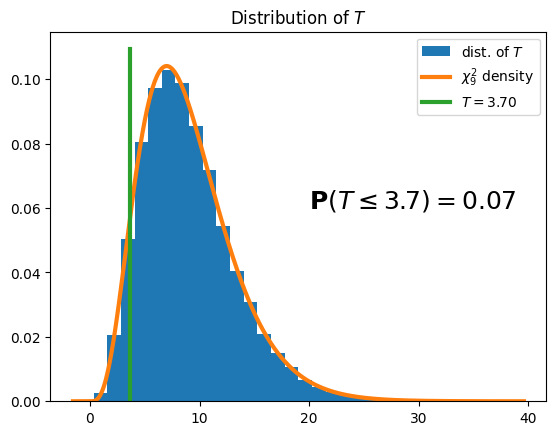

In [ ]:
p = 0.3  # or whatever, the distribution of T is independent of p
r = 100_000
d = stats.binom(100, p)
Y = d.rvs(size=(r, 10))
Ybar = Y.mean(axis=1, keepdims=True)
a = 1 / Ybar + 1 / (100 - Ybar)
b = np.sum((Y - Ybar) ** 2, axis=1, keepdims=True)
Ts = np.squeeze(a * b)
plt.hist(Ts, density=True, bins=30, label="dist. of $T$")
u = np.linspace(*plt.xlim(), 1000)
plt.plot(u, stats.chi2(9).pdf(u), lw=3, label=f"$\\chi^2_9$ density")
plt.plot([T, T], plt.ylim(), lw=3, label=f"$T = {T:.2f}$")
pvalue = stats.chi2(9).cdf(T)
plt.text(
    20,
    0.06,
    f"$\\mathbf{{P}}(T \\leq {T:.1f}) = {pvalue:.2f}$",
    fontsize=18,
)
plt.title("Distribution of $T$")
plt.legend()
plt.show()

## Simulation (GHV Chapter 5)

### Sometimes your model isn't built-in

**Example: (GHV &sect;5.1) A mixture model**

Write a function to sample heights of American adults, given:

- $52\%$ women, $48\%$ men

- Heights of men (inches): $N(\mu = 69.1, \sigma = 2.9)$

- Heights of women (inches): $N(\mu = 63.7, \sigma = 2.7)$

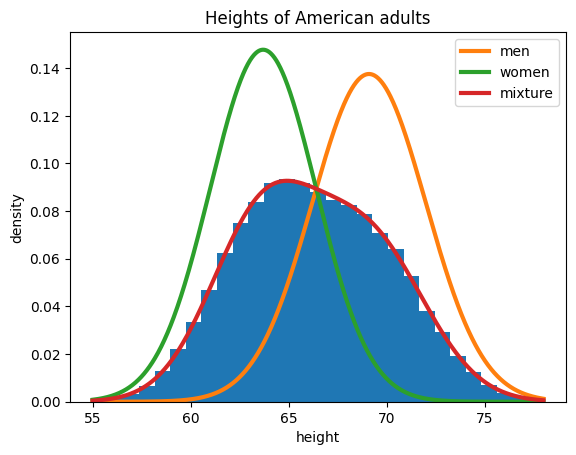

In [209]:
height_men_d = stats.norm(69.1, 2.9)
height_women_d = stats.norm(63.7, 2.7)


def sample_heights(n):
    nmen = stats.binom(n, 0.48).rvs()
    nwomen = n - nmen
    heights_men = height_men_d.rvs(size=nmen)
    heights_women = height_women_d.rvs(size=nwomen)
    heights = np.concat([heights_men, heights_women])
    return heights


heights = sample_heights(100_000)

bins = np.linspace(55, 78, 30)
u = np.linspace(55, 78, 1000)
plt.hist(heights, bins=bins, density=True)
plt.plot(u, height_men_d.pdf(u), lw=3, label="men")
plt.plot(u, height_women_d.pdf(u), lw=3, label="women")
plt.plot(
    u, 0.48 * height_men_d.pdf(u) + 0.52 * height_women_d.pdf(u), lw=3, label="mixture"
)
plt.title("Heights of American adults")
plt.xlabel("height")
plt.ylabel("density")
plt.legend()
plt.show()

***End of class, 2025.01.17 (recorded 2024.01.16)***